In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import date,datetime
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the Dataset
xls = pd.ExcelFile("Data/Cardiac_Outcomes.xlsx")
#Reading the Hospitalization Discharge sheet
df_HD =pd.read_excel(xls,"Hospitalization_Discharge")
#Reading the CardiacComplications sheet
df_CC = pd.read_excel(xls, "CardiacComplications")
#Reading the Responsiveness sheet
df_R = pd.read_excel(xls, "Responsivenes")
#Reading the PatientHistory sheet
df_PH = pd.read_excel(xls, "PatientHistory")
#Reading the Labs sheet
df_L = pd.read_excel(xls, "Labs")
#Reading the Demography sheet
df_D = pd.read_excel(xls, "Demography")
#Reading the patient_Prescriptions sheet
df_PP = pd.read_excel(xls, "Patient_Precriptions")

In [7]:
res = df_HD.head(10)
print (res)

   inpatient_number DestinationDischarge admission_ward admission_way  \
0            857781                 Home     Cardiology  NonEmergency   
1            743087                 Home     Cardiology  NonEmergency   
2            866418                 Home     Cardiology  NonEmergency   
3            775928                 Home     Cardiology     Emergency   
4            810128                 Home     Cardiology  NonEmergency   
5            823318                 Home     Cardiology  NonEmergency   
6            844094                 Home     Cardiology  NonEmergency   
7            787530   HealthcareFacility     Cardiology     Emergency   
8            795420                 Home     Cardiology  NonEmergency   
9            829801                 Home     Cardiology  NonEmergency   

  discharge_department  visit_times respiratory_support oxygen_inhalation  \
0           Cardiology            1                 NaN     OxygenTherapy   
1           Cardiology            1       

In [16]:
#49.Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)
r = df_D.loc[df_D['gender'] == "Male"]
print(r.loc[:, 'inpatient_number':'gender'])


      inpatient_number gender
0               857781   Male
2               866418   Male
3               775928   Male
6               844094   Male
12              802296   Male
...                ...    ...
1994            816947   Male
1997            750447   Male
2001            726701   Male
2005            781004   Male
2006            744870   Male

[845 rows x 2 columns]


In [26]:
#50.Display the lab details of the patient with maximum pulse using the .loc
Pulse = df_L['pulse']
var_Pulse = Pulse.max()
print(var_Pulse)
r = df_L.loc[df_L['pulse'] == var_Pulse]
print(r.to_markdown())


198
|     |   inpatient_number |   body_temperature |   pulse |   respiration |   systolic_blood_pressure |   diastolic_blood_pressure |   map |   fio2 |   creatinine_enzymatic_method |   urea |   uric_acid |   glomerular_filtration_rate |   cystatin |   white_blood_cell |   monocyte_ratio |   monocyte_count |   red_blood_cell |   coefficient_of_variation_of_red_blood_cell_distribution_width |   standard_deviation_of_red_blood_cell_distribution_width |   mean_corpuscular_volume |   hematocrit |   lymphocyte_count |   mean_hemoglobin_volume |   mean_hemoglobin_concentration |   mean_platelet_volume |   basophil_ratio |   basophil_count |   eosinophil_ratio |   eosinophil_count |   hemoglobin |   platelet |   platelet_distribution_width |   platelet_hematocrit |   neutrophil_ratio |   neutrophil_count |   D_dimer |   international_normalized_ratio |   activated_partial_thromboplastin_time |   thrombin_time |   prothrombin_activity |   prothrombin_time_ratio |   fibrinogen |   high_sensit

      pulse ageCat
0        87  69-79
1        95  69-79
2        98  59-69
3        73  69-79
4        88  69-79
...     ...    ...
2003    117  79-89
2004     70  79-89
2005    113  39-49
2006    134  49-59
2007    100  79-89

[2008 rows x 2 columns]


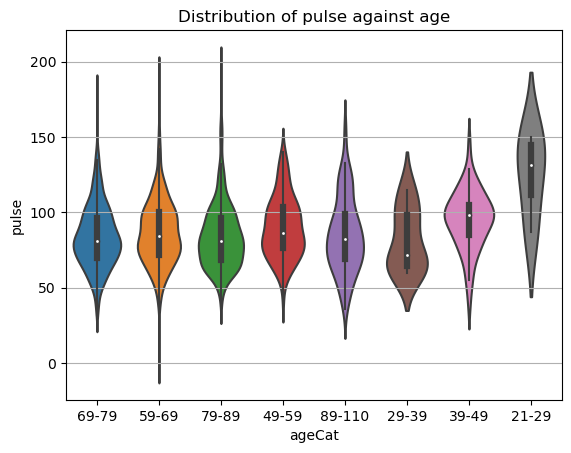

In [11]:
#51.Display a violin chart to show distribution of Pulse Rate against age.

# retain df_D and merge df_L use 'inner join'
dfv = df_D.merge(df_L, on='inpatient_number', how='inner')
dfv_1 = dfv[['pulse','ageCat']]
print(dfv_1)


fontsize = 10

fig, axes = plt.subplots()

sns.violinplot(x = 'ageCat',y = 'pulse', data=dfv_1, ax = axes)
axes.set_title('Distribution of pulse against age')

axes.yaxis.grid(True)
axes.set_xlabel('ageCat')
axes.set_ylabel('pulse')

plt.show()



      readmission_time_days_from_admission ageCat
0                                      NaN  69-79
1                                      NaN  69-79
2                                      NaN  59-69
3                                     19.0  69-79
4                                      NaN  69-79
...                                    ...    ...
2003                                   NaN  79-89
2004                                   NaN  79-89
2005                                  76.0  39-49
2006                                   NaN  49-59
2007                                   NaN  79-89

[2008 rows x 2 columns]


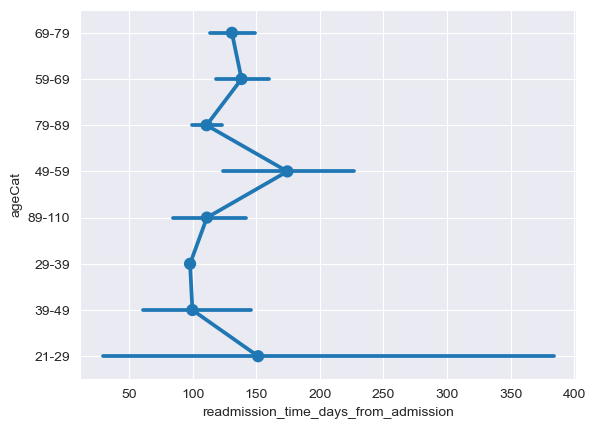

In [25]:
#52.Create a Point Plot on Age against time to readmission.

# retain df_HD and merge df_D use 'inner join'
dfv = df_D.merge(df_HD, on='inpatient_number', how='inner')
dfv_1 = dfv[['readmission_time_days_from_admission','ageCat']]
print(dfv_1)

fontsize = 10

fig, axes = plt.subplots()

sns.pointplot(x = 'readmission_time_days_from_admission', 
              y = 'ageCat', 
              data = dfv_1) 
axes.yaxis.grid(True)
axes.set_xlabel('readmission_time_days_from_admission')
axes.set_ylabel('ageCat')

plt.show()


In [38]:
#53.What is the correlation between CCI score and outcome?

# retain df_HD and merge df_PH use 'inner join'
dfv_2 = df_PH.merge(df_HD, on='inpatient_number', how='inner')
dfv_3 = dfv_2[['outcome_during_hospitalization','CCI_score']]
print(dfv_3)

def Outcome(value):
    if value == 'Alive':
        return 1.0
    if value == 'DischargeAgainstOrder':
        return 2.0
    return 3.0

dfv_4 = dfv_3.assign(outcome_during_hospitalization = dfv_3['outcome_during_hospitalization'].apply(Outcome))
print(dfv_4)

print(dfv_4.corr())

     outcome_during_hospitalization  CCI_score
0                             Alive        2.0
1                             Alive        0.0
2                             Alive        0.0
3                             Alive        2.0
4                             Alive        0.0
...                             ...        ...
2003          DischargeAgainstOrder        2.0
2004                          Alive        1.0
2005                          Alive        2.0
2006          DischargeAgainstOrder        2.0
2007                          Alive        2.0

[2008 rows x 2 columns]
      outcome_during_hospitalization  CCI_score
0                                1.0        2.0
1                                1.0        0.0
2                                1.0        0.0
3                                1.0        2.0
4                                1.0        0.0
...                              ...        ...
2003                             2.0        2.0
2004                       

In [39]:
#54. For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

myArray = [0,1,2,6,8] 
for each thing in myArray: 
  print(thing) 

SyntaxError: invalid syntax (3098776540.py, line 4)

      dischargeDay  diastolic_blood_pressure
0               11                        64
1                8                        70
2                5                        67
3               11                        74
4                5                        62
...            ...                       ...
2003             5                        80
2004             8                        86
2005            14                       100
2006             1                        72
2007             6                        80

[2008 rows x 2 columns]


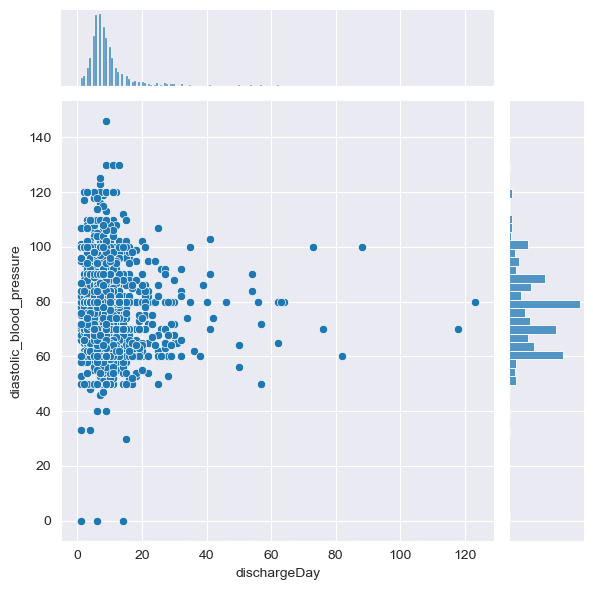

In [43]:
#55. Create a jointplot on diastolic_blood_pressure & length of stay

dfv = df_L.merge(df_HD, on='inpatient_number', how='inner')
dfv_1 = dfv[['dischargeDay','diastolic_blood_pressure']]
print(dfv_1)


sns.jointplot(x = 'dischargeDay', y = 'diastolic_blood_pressure',data = dfv_1)


In [23]:
#56.Using loc, retrieve the agegroup and weight between indices 101 and 201.

dfv = df_D[['ageCat','weight']]


print(dfv.loc[101:201])



     ageCat  weight
101   69-79    41.0
102   79-89    64.0
103   79-89    61.0
104   79-89    40.0
105   69-79    73.0
..      ...     ...
197   79-89    50.0
198  89-110    50.0
199   69-79    50.0
200   59-69    63.0
201   69-79    60.0

[101 rows x 2 columns]


In [46]:
#57. Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as values
dfv = df_HD[['inpatient_number','outcome_during_hospitalization','admission_ward']]


pivot = dfv.pivot_table(index =['outcome_during_hospitalization'],values = ['inpatient_number'], columns =['admission_ward'], aggfunc ='count')
print(pivot)

                               inpatient_number                       
admission_ward                       Cardiology GeneralWard ICU Others
outcome_during_hospitalization                                        
Alive                                      1472         238  12    168
Dead                                          8           1   1      1
DischargeAgainstOrder                        67          26   2     12


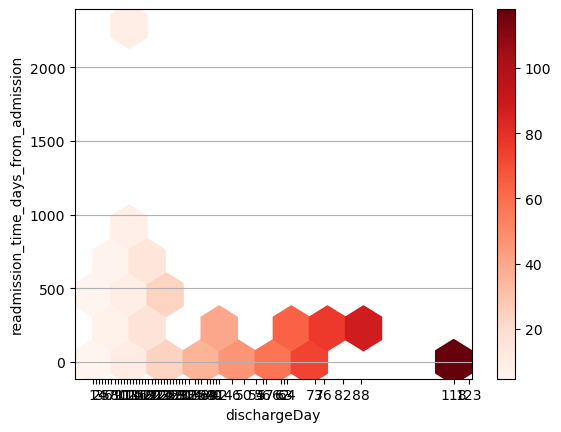

In [56]:
#58.Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

fig, axes = plt.subplots()
hex_ax = axes.hexbin(x=df_HD['dischargeDay'], y=df_HD['readmission_time_days_from_admission'], C=df_HD['dischargeDay'], 
                   gridsize=10, cmap=plt.cm.Reds)
fig.colorbar(hex_ax)
axes.yaxis.grid(True)
axes.set_xlabel('dischargeDay')
axes.set_ylabel('readmission_time_days_from_admission')
plt.xticks(np.unique(df_HD['dischargeDay'].values))
plt.show()

In [67]:
#59.Using Sunburst chart display patients Age group, occupation and BMI Group
import plotly.express as px

dfv = df_D[['ageCat','occupation','BMI']]
print(dfv)
data_df = dfv.fillna('end')
fig = px.sunburst(data_df, path=["ageCat","occupation","BMI"], height = 1000)
fig.show()


     ageCat     occupation        BMI
0     69-79  UrbanResident  18.590125
1     69-79  UrbanResident  19.195303
2     59-69         farmer  24.221453
3     69-79  UrbanResident  22.491349
4     69-79  UrbanResident  31.633715
...     ...            ...        ...
2003  79-89         Others  15.555556
2004  79-89  UrbanResident  20.811655
2005  39-49  UrbanResident  25.951557
2006  49-59  UrbanResident  17.777778
2007  79-89  UrbanResident  18.730489

[2008 rows x 3 columns]


      visit_times
0               1
1               1
2               2
3               1
4               1
...           ...
2003            1
2004            1
2005            1
2006            1
2007            1

[2008 rows x 1 columns]


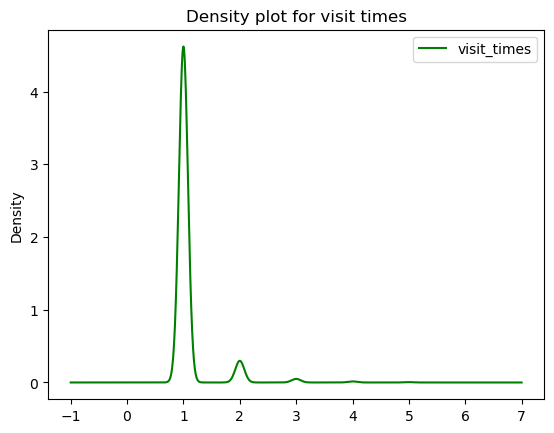

In [72]:
#60. Plot the Density Chart for visit times

dfv = df_HD[['visit_times']]
print(dfv)

dfv.plot.density(color='green') 
plt.title('Density plot for visit times') 
plt.show()

In [78]:
#61.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

arr = np.arange(1,31).reshape(6,5)

arr2 = arr[2:4, 0:2]
print(arr2.reshape(1,4))

[[11 12 16 17]]


In [117]:
#62.What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group?

dfv = df_HD[['outcome_during_hospitalization','death_within_28_days','inpatient_number']]
dfv_m = dfv.merge(df_L, on='inpatient_number', how='inner')
dfv_m1 = dfv_m[['outcome_during_hospitalization','death_within_28_days','mean_platelet_volume']]
dfv1=dfv_m1.loc[dfv_m1['outcome_during_hospitalization'] == 'Alive']
denom=dfv1.count()
print(denom)
dfv2=dfv1.loc[dfv1['death_within_28_days'] == 1]
numer=dfv2.count()
print(numer)
perc=round((numer/denom)*100,2)
print(perc)
print(dfv2['mean_platelet_volume'])


outcome_during_hospitalization    1890
death_within_28_days              1890
mean_platelet_volume              1791
dtype: int64
outcome_during_hospitalization    8
death_within_28_days              8
mean_platelet_volume              8
dtype: int64
outcome_during_hospitalization    0.42
death_within_28_days              0.42
mean_platelet_volume              0.45
dtype: float64
43      12.4
74      14.3
94      11.9
140     12.8
398     13.4
505     10.4
569     11.3
1339    14.3
Name: mean_platelet_volume, dtype: float64


In [128]:
#63. find the patients who have 'h' in their DestinationDischarge and print them

dfv = df_HD[['DestinationDischarge']]
dfv = dfv[dfv['DestinationDischarge'].str.contains('H')] 
print(dfv) 

     DestinationDischarge
0                    Home
1                    Home
2                    Home
3                    Home
4                    Home
...                   ...
2002   HealthcareFacility
2003   HealthcareFacility
2004   HealthcareFacility
2005   HealthcareFacility
2007                 Home

[1782 rows x 1 columns]


gender  ageCat
Female  21-29       3
        29-39       5
        39-49      18
        49-59      51
        59-69     190
        69-79     421
        79-89     409
        89-110     66
Male    21-29       1
        29-39       7
        39-49      38
        49-59      55
        59-69     178
        69-79     294
        79-89     237
        89-110     35
Name: gender, dtype: int64


<Axes: xlabel='gender'>

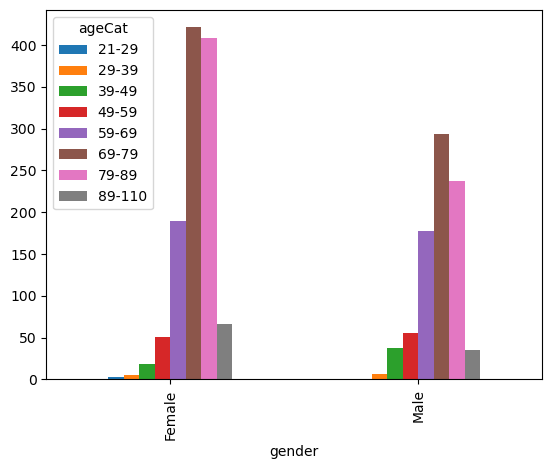

In [141]:
#64.Create a grouped bar chart that shows number of patients by gender and ageCat

dfv = df_D[['gender','ageCat']]
dfv_1 = dfv.groupby(['gender','ageCat'])['gender'].count()
print(dfv_1)
dfv_1.unstack(level=1).plot.bar()

